In [1]:
import numpy as np #Linear algebra
import pandas as pd #Data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
import seaborn as sns
import pickle

#Download and loading Dataset
!wget -nc https://downloads.hindawi.com/journals/bmri/2014/781670.f1.zip
!unzip /content/781670.f1.zip
data = pd.read_csv("/content/diabetic_data_initial.csv")

--2023-06-02 12:26:47--  https://downloads.hindawi.com/journals/bmri/2014/781670.f1.zip
Resolving downloads.hindawi.com (downloads.hindawi.com)... 104.18.16.181, 104.18.17.181, 2606:4700::6812:10b5, ...
Connecting to downloads.hindawi.com (downloads.hindawi.com)|104.18.16.181|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2920439 (2.8M) [application/octet-stream]
Saving to: ‘781670.f1.zip’

781670.f1.zip       100%[===================>]   2.78M  --.-KB/s    in 0.07s   

2023-06-02 12:26:47 (40.2 MB/s) - ‘781670.f1.zip’ saved [2920439/2920439]

Archive:  /content/781670.f1.zip
  inflating: diabetic_data_initial.csv  
  inflating: id_mapping.csv          


In [2]:
#Checking data types of each variable
print('Data shape: {}'.format(data.shape))
print(data.dtypes)
#Checking shape and displaying first 10 rows of data
data.head(10).T

Data shape: (101766, 50)
encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              ob

,0,1,2,3,4,5,6,7,8,9
encounter_id,2278392,149190,64410,500364,16680,35754,55842,63768,12522,15738
patient_nbr,8222157,55629189,86047875,82442376,42519267,82637451,84259809,114882984,48330783,63555939
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male,Male,Male,Male,Female,Female
age,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100)
weight,?,?,?,?,?,?,?,?,?,?
admission_type_id,6,1,1,1,1,2,3,1,2,3
discharge_disposition_id,25,1,1,1,1,1,1,1,1,3
admission_source_id,1,7,7,7,7,2,2,7,4,4
time_in_hospital,1,3,2,2,1,3,4,5,13,12


In [3]:
data = data[['patient_nbr', 'race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
               'time_in_hospital', 'number_diagnoses', 'num_lab_procedures', 'num_procedures', 'num_medications',
               'diag_1', 'max_glu_serum', 'A1Cresult', 'metformin', 'glimepiride', 'glipizide',
               'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin', 'change', 'diabetesMed', 'readmitted']]
#Checking data types of each variable
print('Data shape: {}'.format(data.shape))
print(data.dtypes)
#Checking shape and displaying first 10 rows of data
data.head(10).T

Data shape: (101766, 25)
patient_nbr                  int64
race                        object
gender                      object
age                         object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
number_diagnoses             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
diag_1                      object
max_glu_serum               object
A1Cresult                   object
metformin                   object
glimepiride                 object
glipizide                   object
glyburide                   object
pioglitazone                object
rosiglitazone               object
insulin                     object
change                      object
diabetesMed                 object
readmitted                  object
dtype: object


,0,1,2,3,4,5,6,7,8,9
patient_nbr,8222157,55629189,86047875,82442376,42519267,82637451,84259809,114882984,48330783,63555939
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male,Male,Male,Male,Female,Female
age,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100)
admission_type_id,6,1,1,1,1,2,3,1,2,3
discharge_disposition_id,25,1,1,1,1,1,1,1,1,3
admission_source_id,1,7,7,7,7,2,2,7,4,4
time_in_hospital,1,3,2,2,1,3,4,5,13,12
number_diagnoses,1,9,6,7,5,9,7,8,8,8
num_lab_procedures,41,59,11,44,51,31,70,73,68,33


In [4]:
#Checking for missing values in dataset
#In the dataset missing values are represented as '?' sign
for col in data.columns:
    if data[col].dtype == object:
         print(col,data[col][data[col] == '?'].count())

# gender was coded differently so we use a custom count for this one            
print('gender', data['gender'][data['gender'] == 'Unknown/Invalid'].count())    

race 2273
gender 0
age 0
diag_1 21
max_glu_serum 0
A1Cresult 0
metformin 0
glimepiride 0
glipizide 0
glyburide 0
pioglitazone 0
rosiglitazone 0
insulin 0
change 0
diabetesMed 0
readmitted 0
gender 3


In [5]:
data['readmitted'].value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

Encoding the outcome variable: The outcome we are looking at is whether the patient gets readmitted to the hospital within 30 days or not. The variable actually has < 30, > 30 and No Readmission categories. To reduce our problem to a binary classification, we combined the readmission after 30 days and no readmission into a single category:

In [6]:
data['readmitted'] = data['readmitted'].replace('>30', 0)
data['readmitted'] = data['readmitted'].replace('<30', 1)
data['readmitted'] = data['readmitted'].replace('NO', 0)

In [7]:
data['readmitted'].value_counts()

0    90409
1    11357
Name: readmitted, dtype: int64

In [8]:
#Reviewing the data
#patient_nbr: Unique identifier of a patient, keep only the first record of each patient
data_0 = data.loc[data['readmitted'] == 0]
data_1 = data.loc[data['readmitted'] == 1]
data_0 = data_0.drop_duplicates(subset='patient_nbr', keep='first')
data_0 = data_0[(data_0['race'] != '?')]
data_0 = data_0[(data_0['diag_1'] != '?')]
data_0 = data_0[(data_0['gender'] != 'Unknown/Invalid')]
data_0 = data_0[~data['discharge_disposition_id'].isin([11, 13, 14, 19, 20, 21])]
data_1['race'] = data_1['race'].replace('?', 'Caucasian')
data = pd.concat([data_0, data_1], ignore_index=True)
#encounter_id: Unique identifier of an encounter, remove both columns
data = data.drop(columns=['patient_nbr', 'diag_1'])
print(data.dtypes)

race                        object
gender                      object
age                         object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
number_diagnoses             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
glimepiride                 object
glipizide                   object
glyburide                   object
pioglitazone                object
rosiglitazone               object
insulin                     object
change                      object
diabetesMed                 object
readmitted                   int64
dtype: object


<ipython-input-8-23b349b7d9a9>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_0 = data_0[~data['discharge_disposition_id'].isin([11, 13, 14, 19, 20, 21])]
<ipython-input-8-23b349b7d9a9>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1['race'] = data_1['race'].replace('?', 'Caucasian')


In [9]:
#Checking for missing values in dataset
#In the dataset missing values are represented as '?' sign
for col in data.columns:
    if data[col].dtype == object:
         print(col,data[col][data[col] == '?'].count())

# gender was coded differently so we use a custom count for this one            
print('gender', data['gender'][data['gender'] == 'Unknown/Invalid'].count())  

race 0
gender 0
age 0
max_glu_serum 0
A1Cresult 0
metformin 0
glimepiride 0
glipizide 0
glyburide 0
pioglitazone 0
rosiglitazone 0
insulin 0
change 0
diabetesMed 0
gender 0


In [10]:
#ohe (one-hot encoding) = race
encoded_race = pd.get_dummies(data['race'], prefix='race')
# Concatenar las columnas codificadas al dataframe original
data = pd.concat([data, encoded_race], axis=1)
# Eliminar la columna original 'race'
data.drop('race', axis=1, inplace=True)
#Checking shape and displaying first 10 rows of data
data.head(10).T

,0,1,2,3,4,5,6,7,8,9
gender,Female,Female,Female,Male,Male,Male,Male,Male,Female,Female
age,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100)
admission_type_id,6,1,1,1,1,2,3,1,2,3
discharge_disposition_id,25,1,1,1,1,1,1,1,1,3
admission_source_id,1,7,7,7,7,2,2,7,4,4
time_in_hospital,1,3,2,2,1,3,4,5,13,12
number_diagnoses,1,9,6,7,5,9,7,8,8,8
num_lab_procedures,41,59,11,44,51,31,70,73,68,33
num_procedures,0,0,5,1,0,6,1,0,2,3
num_medications,1,18,13,16,8,16,21,12,28,18


In [11]:
#Binarización: gender, change, diabetesMed
from sklearn.preprocessing import LabelEncoder
# Crear una instancia del LabelEncoder
encoder = LabelEncoder()
# Aplicar la codificación binaria a la variable 'gender'
data['gender'] = encoder.fit_transform(data['gender'])
data['change'] = encoder.fit_transform(data['change'])
data['diabetesMed'] = encoder.fit_transform(data['diabetesMed'])
#Checking shape and displaying first 10 rows of data
data.head(10).T

,0,1,2,3,4,5,6,7,8,9
gender,0,0,0,1,1,1,1,1,0,0
age,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100)
admission_type_id,6,1,1,1,1,2,3,1,2,3
discharge_disposition_id,25,1,1,1,1,1,1,1,1,3
admission_source_id,1,7,7,7,7,2,2,7,4,4
time_in_hospital,1,3,2,2,1,3,4,5,13,12
number_diagnoses,1,9,6,7,5,9,7,8,8,8
num_lab_procedures,41,59,11,44,51,31,70,73,68,33
num_procedures,0,0,5,1,0,6,1,0,2,3
num_medications,1,18,13,16,8,16,21,12,28,18


In [12]:
#Ordinal: age, max_glu_serum, A1Cresult, metformin, glimepiride, glyburide,
#pioglitazone, pioglitazone, rosiglitazone, insulin
age_mapping = {
    '[0-10)': 0, '[10-20)': 1, '[20-30)': 2, '[30-40)': 3, '[40-50)': 4,
    '[50-60)': 5, '[60-70)': 6, '[70-80)': 7, '[80-90)': 8, '[90-100)': 9
}
max_glu_serum_mapping = {
    'None': 0, 'Norm': 1, '>200': 2, '>300': 3
}
A1Cresult_mapping = {
    'None': 0, 'Norm': 1, '>7': 2, '>8': 3
}
metformin_mapping = {
    'No': 0, 'Steady': 1, 'Up': 2, 'Down': 3
}
glimepiride_mapping = {
    'No': 0, 'Steady': 1, 'Up': 2, 'Down': 3
}
glipizide_mapping = {
    'No': 0, 'Steady': 1, 'Up': 2, 'Down': 3
}
glyburide_mapping = {
    'No': 0, 'Steady': 1, 'Up': 2, 'Down': 3
}
pioglitazone_mapping = {
    'No': 0, 'Steady': 1, 'Up': 2, 'Down': 3
}
rosiglitazone_mapping = {
    'No': 0, 'Steady': 1, 'Up': 2, 'Down': 3
}
insulin_mapping = {
    'No': 0, 'Steady': 1, 'Up': 2, 'Down': 3
}

# Aplicar la codificación ordinal a la variable 'age'
data['age'] = data['age'].map(age_mapping)
data['max_glu_serum'] = data['max_glu_serum'].map(max_glu_serum_mapping)
data['A1Cresult'] = data['A1Cresult'].map(A1Cresult_mapping)
data['metformin'] = data['metformin'].map(metformin_mapping)
data['glimepiride'] = data['glimepiride'].map(glimepiride_mapping)
data['glipizide'] = data['glipizide'].map(glipizide_mapping)
data['glyburide'] = data['glyburide'].map(glyburide_mapping)
data['pioglitazone'] = data['pioglitazone'].map(pioglitazone_mapping)
data['rosiglitazone'] = data['rosiglitazone'].map(rosiglitazone_mapping)
data['insulin'] = data['insulin'].map(insulin_mapping)
#Checking shape and displaying first 10 rows of data
print(data.dtypes)
data.head(10).T

gender                      int64
age                         int64
admission_type_id           int64
discharge_disposition_id    int64
admission_source_id         int64
time_in_hospital            int64
number_diagnoses            int64
num_lab_procedures          int64
num_procedures              int64
num_medications             int64
max_glu_serum               int64
A1Cresult                   int64
metformin                   int64
glimepiride                 int64
glipizide                   int64
glyburide                   int64
pioglitazone                int64
rosiglitazone               int64
insulin                     int64
change                      int64
diabetesMed                 int64
readmitted                  int64
race_AfricanAmerican        uint8
race_Asian                  uint8
race_Caucasian              uint8
race_Hispanic               uint8
race_Other                  uint8
dtype: object


,0,1,2,3,4,5,6,7,8,9
gender,0,0,0,1,1,1,1,1,0,0
age,0,1,2,3,4,5,6,7,8,9
admission_type_id,6,1,1,1,1,2,3,1,2,3
discharge_disposition_id,25,1,1,1,1,1,1,1,1,3
admission_source_id,1,7,7,7,7,2,2,7,4,4
time_in_hospital,1,3,2,2,1,3,4,5,13,12
number_diagnoses,1,9,6,7,5,9,7,8,8,8
num_lab_procedures,41,59,11,44,51,31,70,73,68,33
num_procedures,0,0,5,1,0,6,1,0,2,3
num_medications,1,18,13,16,8,16,21,12,28,18


(76974, 27)
0    65617
1    11357
Name: readmitted, dtype: int64


Text(0.5, 1.0, 'Distrinution of Readmission')

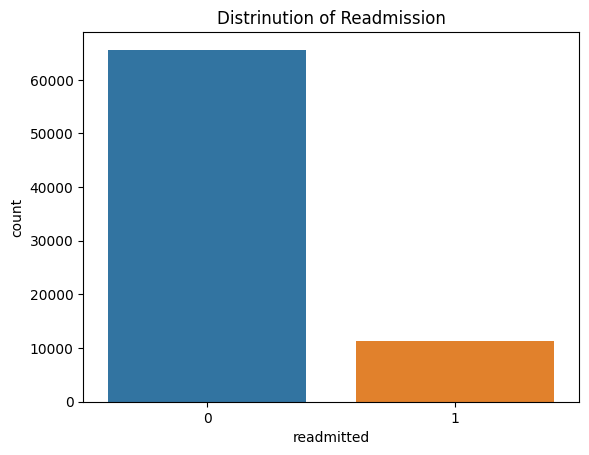

In [13]:
print(data.shape)
print(data['readmitted'].value_counts())
# Distribution of Readmission 
import seaborn as sns
sns.countplot(x=data["readmitted"]).set_title('Distrinution of Readmission')

(22714, 27)
1    11357
0    11357
Name: readmitted, dtype: int64


Text(0.5, 1.0, 'Distrinution of Readmission')

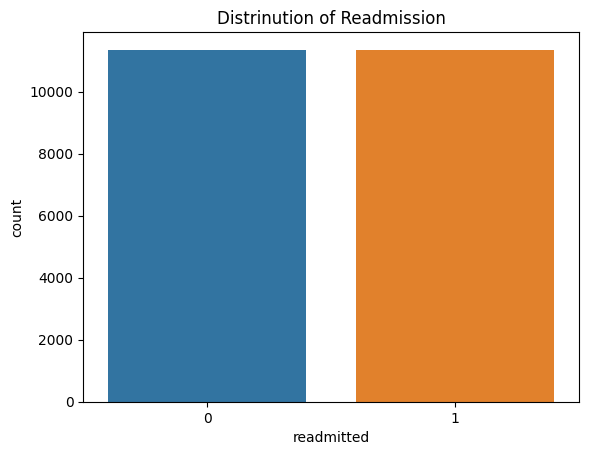

In [18]:
#split the training ata into positive and negative
rows_positive = data['readmitted'] == 1
data_pos = data.loc[rows_positive]
data_neg = data.loc[~rows_positive]
#merge de balance data
data = pd.concat([data_pos, data_neg.sample(n = len(data_pos))], axis=0)
#huffle the order of training samples
data = data.sample(n=len(data)).reset_index(drop=True)

print(data.shape)
print(data['readmitted'].value_counts())
# Distribution of Readmission 
import seaborn as sns
sns.countplot(x=data["readmitted"]).set_title('Distrinution of Readmission')

In [19]:
y = data['readmitted']
X = data.drop('readmitted', axis=1)
#Perform a sampling to divide between train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(y_train.value_counts())
print(y_test.value_counts())
X.dtypes

(15899, 26) (15899,)
(6815, 26) (6815,)
0    7952
1    7947
Name: readmitted, dtype: int64
1    3410
0    3405
Name: readmitted, dtype: int64


gender                      int64
age                         int64
admission_type_id           int64
discharge_disposition_id    int64
admission_source_id         int64
time_in_hospital            int64
number_diagnoses            int64
num_lab_procedures          int64
num_procedures              int64
num_medications             int64
max_glu_serum               int64
A1Cresult                   int64
metformin                   int64
glimepiride                 int64
glipizide                   int64
glyburide                   int64
pioglitazone                int64
rosiglitazone               int64
insulin                     int64
change                      int64
diabetesMed                 int64
race_AfricanAmerican        uint8
race_Asian                  uint8
race_Caucasian              uint8
race_Hispanic               uint8
race_Other                  uint8
dtype: object

In [20]:
#Checking shape and displaying first 10 rows of X_train
print(X_train.shape)
X_train.head(10).T

(15899, 26)


,13135,4152,17344,5086,22410,1397,9271,15559,14945,7886
gender,0,1,1,0,1,0,1,1,0,1
age,9,7,7,6,6,7,6,5,5,8
admission_type_id,2,2,2,2,3,1,3,1,1,5
discharge_disposition_id,6,3,1,2,1,1,18,1,1,3
admission_source_id,7,1,1,1,1,7,1,7,7,1
time_in_hospital,2,3,4,9,2,3,5,5,2,7
number_diagnoses,9,7,8,9,7,8,4,9,4,9
num_lab_procedures,9,42,44,40,17,58,48,74,41,64
num_procedures,0,0,0,1,1,0,5,1,0,2
num_medications,8,12,13,16,20,7,31,21,16,30


In [21]:
from tensorflow.keras import utils 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_trainN = scaler.fit_transform(X_train)
X_testN = scaler.transform(X_test)

In [22]:
#Red neuronal más simple
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

input_dim = X_train.shape[1]

# Definir la arquitectura del modelo
model = Sequential([
    Dense(16, activation='relu', input_shape=(input_dim,)),  # Capa oculta con 16 neuronas
    Dense(1, activation='sigmoid')  # Capa de salida con una neurona (predicción binaria)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                432       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 449
Trainable params: 449
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.models import Sequential
#Modelo RNN LSTM
# Definir el modelo RNN LSTM
model = Sequential()
model.add(LSTM(64, input_shape=(1, X_train.shape[1])))
#model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
model.summary()

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout

# Definir la arquitectura de la CNN
model = Sequential()
# Primera capa de convolución
model.add(Conv1D(64, 3, activation='relu', input_shape=(X_train.shape[1], 1)))
# Capa de Dropout para regularización
model.add(Dropout(0.25))
# Segunda capa de convolución
model.add(Conv1D(128, 3, activation='relu'))
# Capa de Dropout para regularización
model.add(Dropout(0.25))
# Capa de aplanamiento
model.add(Flatten())
# Capa completamente conectada
model.add(Dense(256, activation='relu'))
# Capa de Dropout para regularización
model.add(Dropout(0.5))
# Capa de salida
model.add(Dense(1, activation='sigmoid'))
# Imprimir un resumen de la arquitectura de la red
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 24, 64)            256       
                                                                 
 dropout (Dropout)           (None, 24, 64)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 22, 128)           24704     
                                                                 
 dropout_1 (Dropout)         (None, 22, 128)           0         
                                                                 
 flatten (Flatten)           (None, 2816)              0         
                                                                 
 dense (Dense)               (None, 256)               721152    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0

In [ ]:
from tensorflow.keras.layers import LSTM, Bidirectional, Dropout, Dense, Conv1D, Attention
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(1, X_train.shape[1])))
model.add(Dropout(0.3))  # Agregar capa de Dropout para regularización
model.add(Bidirectional(LSTM(32, return_sequences=True)))
model.add(Dropout(0.3))  # Agregar capa de Dropout para regularización
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))

model.summary()

In [23]:
from tensorflow.keras.callbacks import EarlyStopping
# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Entrenar el modelo
# Preparar los datos de entrada en el formato adecuado para RNN --> [n_samples,n_times,n_features]
X_trainRnn = np.reshape(X_trainN, (X_trainN.shape[0], 1, X_trainN.shape[1]))
X_testRnn = np.reshape(X_testN, (X_testN.shape[0], 1, X_testN.shape[1]))
#model.fit(X_trainRnn, y_train, batch_size=32, epochs=12, validation_data=(X_testRnn, y_test))
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
model.fit(X_trainN, y_train, batch_size=32, epochs=12, validation_data=(X_testN, y_test), callbacks=[early_stopping])

Epoch 1/12
497/497 [==============================] - 14s 23ms/step - loss: 0.6767 - accuracy: 0.5745 - val_loss: 0.6735 - val_accuracy: 0.5773
Epoch 2/12
497/497 [==============================] - 13s 25ms/step - loss: 0.6705 - accuracy: 0.5856 - val_loss: 0.6701 - val_accuracy: 0.5864
Epoch 3/12
497/497 [==============================] - 13s 26ms/step - loss: 0.6685 - accuracy: 0.5866 - val_loss: 0.6701 - val_accuracy: 0.5900
Epoch 4/12
497/497 [==============================] - 13s 26ms/step - loss: 0.6672 - accuracy: 0.5931 - val_loss: 0.6680 - val_accuracy: 0.5931
Epoch 5/12
497/497 [==============================] - 13s 25ms/step - loss: 0.6666 - accuracy: 0.5922 - val_loss: 0.6696 - val_accuracy: 0.5903
Epoch 6/12
497/497 [==============================] - 13s 26ms/step - loss: 0.6649 - accuracy: 0.5932 - val_loss: 0.6686 - val_accuracy: 0.5921
Epoch 7/12
497/497 [==============================] - 11s 22ms/step - loss: 0.6625 - accuracy: 0.5994 - val_loss: 0.6721 - val_accuracy:

In [24]:
# Evaluar el modelo con los datos de prueba, por el momento no lo quiero ya que es engañoso
#Es alto porque la mayoría de datos son '0' pero predice mal los readmitidos
#loss, accuracy = model.evaluate(X_testRnn, y_test)
loss, accuracy = model.evaluate(X_testN, y_test)

213/213 [==============================] - 2s 8ms/step - loss: 0.6721 - accuracy: 0.5850


In [26]:
from sklearn.metrics import confusion_matrix, classification_report

# Obtener las probabilidades de clase del modelo en los datos de prueba
#y_pred_prob = model.predict(X_testRnn)
y_pred_prob = model.predict(X_testN)

# Aplicar umbral de decisión para obtener predicciones de clase
y_pred = (y_pred_prob >= 0.5).astype(int)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Obtener las métricas de clasificación para cada clase
classification_rep = classification_report(y_test, y_pred)

print("Matriz de confusión:")
print(cm)
print("\nReporte de clasificación:")
print(classification_rep)

213/213 [==============================] - 2s 8ms/step
Matriz de confusión:
[[2354 1051]
 [1777 1633]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.57      0.69      0.62      3405
           1       0.61      0.48      0.54      3410

    accuracy                           0.59      6815
   macro avg       0.59      0.59      0.58      6815
weighted avg       0.59      0.59      0.58      6815

